In [1]:
#https://nandakishorej8.medium.com/auto-tuning-multiple-timeseries-sarimax-model-with-a-case-study-and-detailed-code-explanation-c136293b8457
#https://www.youtube.com/watch?v=8lXNzQqsvCY

import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

df = pd.read_csv('mvw_AllProjects_Summary.csv')
df['createdat'] = pd.to_datetime(df['createdat'])
df['createdat'] = df['createdat'].dt.date

#Create analysis data frame
df_source = pd.DataFrame()
df_source['createdat'] = pd.to_datetime(df['createdat'])

#df_source['delete'] = df['deleteevent']
#df_source['fork'] = df['forkevent']
#df_source['issues'] = df['issuesevent']
df_source['pullrequests'] = df['pullrequestevent']
#df_source['watch'] = df['watchevent']

df_source=df_source.set_index('createdat')
df_source = df_source.resample('M').sum()

y = df_source.resample('M').sum()
y['2019':]

df_source.head()

,pullrequests
createdat,
2018-01-31,2923259
2018-02-28,2937958
2018-03-31,3446301
2018-04-30,2940791
2018-05-31,2249497


In [2]:
#Check for missing or null value
#False means no missing values
print ("\nMissing values :  ", df_source.isnull().any())


Missing values :   pullrequests    False
dtype: bool


In [3]:
p = d = q = range(0,2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [4]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(y['pullrequests'], 
                          order=param, 
                          seasonal_order=param_seasonal,
                          enforce_stationarity=False,
                          enforce_invertibility = False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC {}'.format(param,param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC 1946.8389882198535
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC 1526.6684338704317
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC 1470.4367000941872
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC 3123.4256203152227
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC 1499.4746555082675
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC 1473.5755946374443
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC 1111.7116364258914
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC 3144.3897851971947
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC 1883.581708561394
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC 1473.7971685337639
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC 1436.4439992229204
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC 3002.7928353293846
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC 1532.5862105382141
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC 1466.786678000177
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC 1112.3426096034646
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC 3025.8474104198467
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC 1821.980666285049
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC 1443.043875499

In [5]:
mod = SARIMAX(y['pullrequests'], 
              order=(1,1,1), 
              seasonal_order=(1,1,0,12),
              enforce_stationarity=False,
              enforce_invertibility = False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2696      0.272      0.993      0.321      -0.263       0.802
ma.L1         -1.1253      0.163     -6.913      0.000      -1.444      -0.806
ar.S.L12      -0.7089      0.419     -1.692      0.091      -1.530       0.112
sigma2      1.979e+13   9.48e-15   2.09e+27      0.000    1.98e+13    1.98e+13


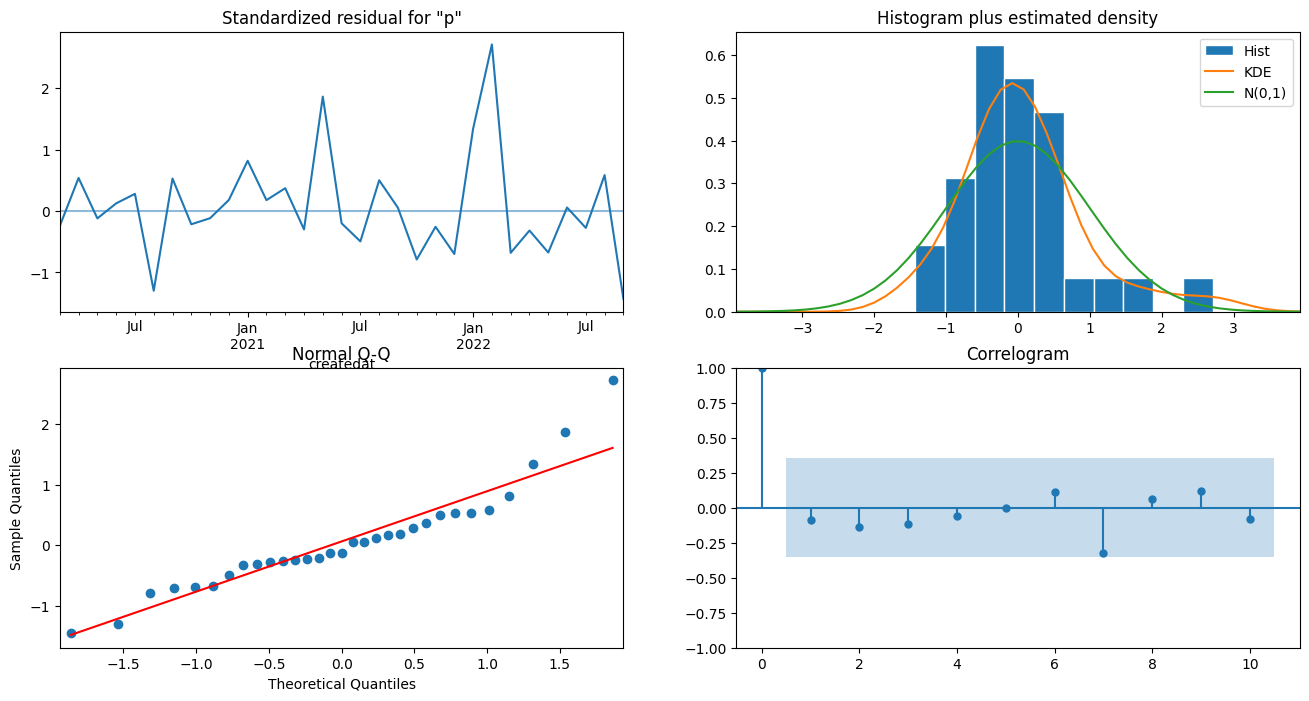

In [6]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

<Axes: xlabel='createdat'>

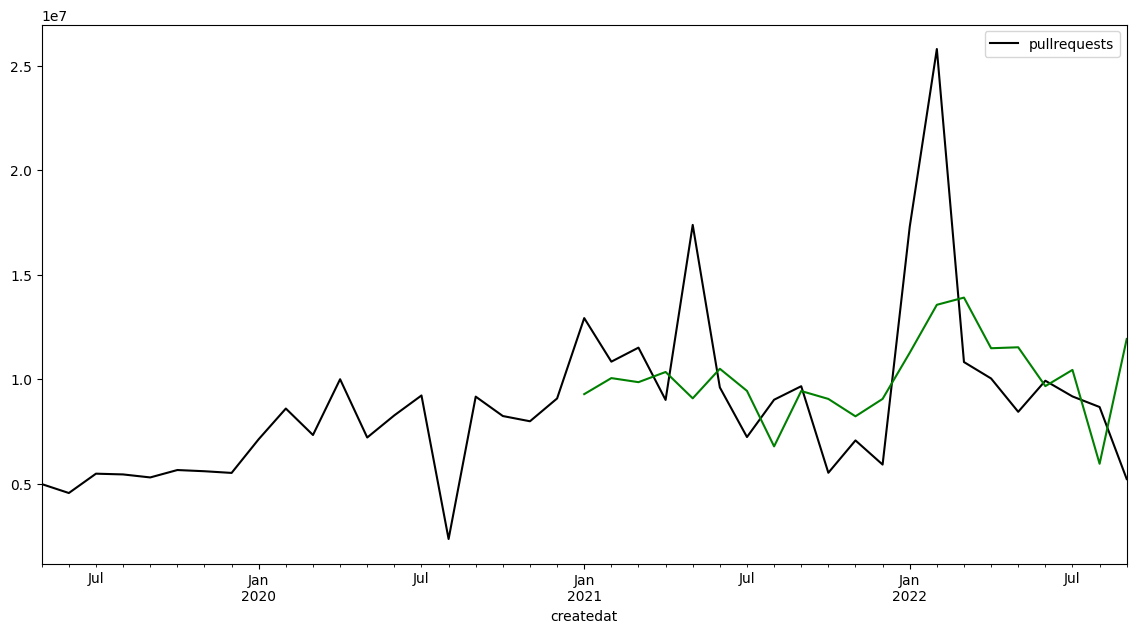

In [7]:
forecast=results.predict(n_periods=4, return_conf_int=True)
#forecast.head()

from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color='kg')
pred = results.get_prediction(start=pd.to_datetime('2021-01-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2019-05-8':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=1, figsize=(14,7))

In [8]:
model = SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12), trend='c')

# Fit model
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                        pullrequests   No. Observations:                   57
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                -728.136
Date:                             Tue, 13 Jun 2023   AIC                           1466.271
Time:                                     03:54:03   BIC                           1475.192
Sample:                                 01-31-2018   HQIC                          1469.580
                                      - 09-30-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.639e+05   1.98e+05     -0.826      0.409   -5.53e+05    2.25e+05
ar.L1          0.1051      0.217      0.483      0.629      -0.321       0.531
ma.L1         -0.8397      0.218     -3.859      0.000      -1.266      -0.413
ar.S.L12      -0.6744      0.369     -1.828      0.068      -1.398       0.049
sigma2      1.975e+13      0.005   4.31e+15      0.000    1.98e+13    1.98e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                23.38
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):              12.40   Skew:                             1.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.16e+31. Standard errors may be unstable.
"""

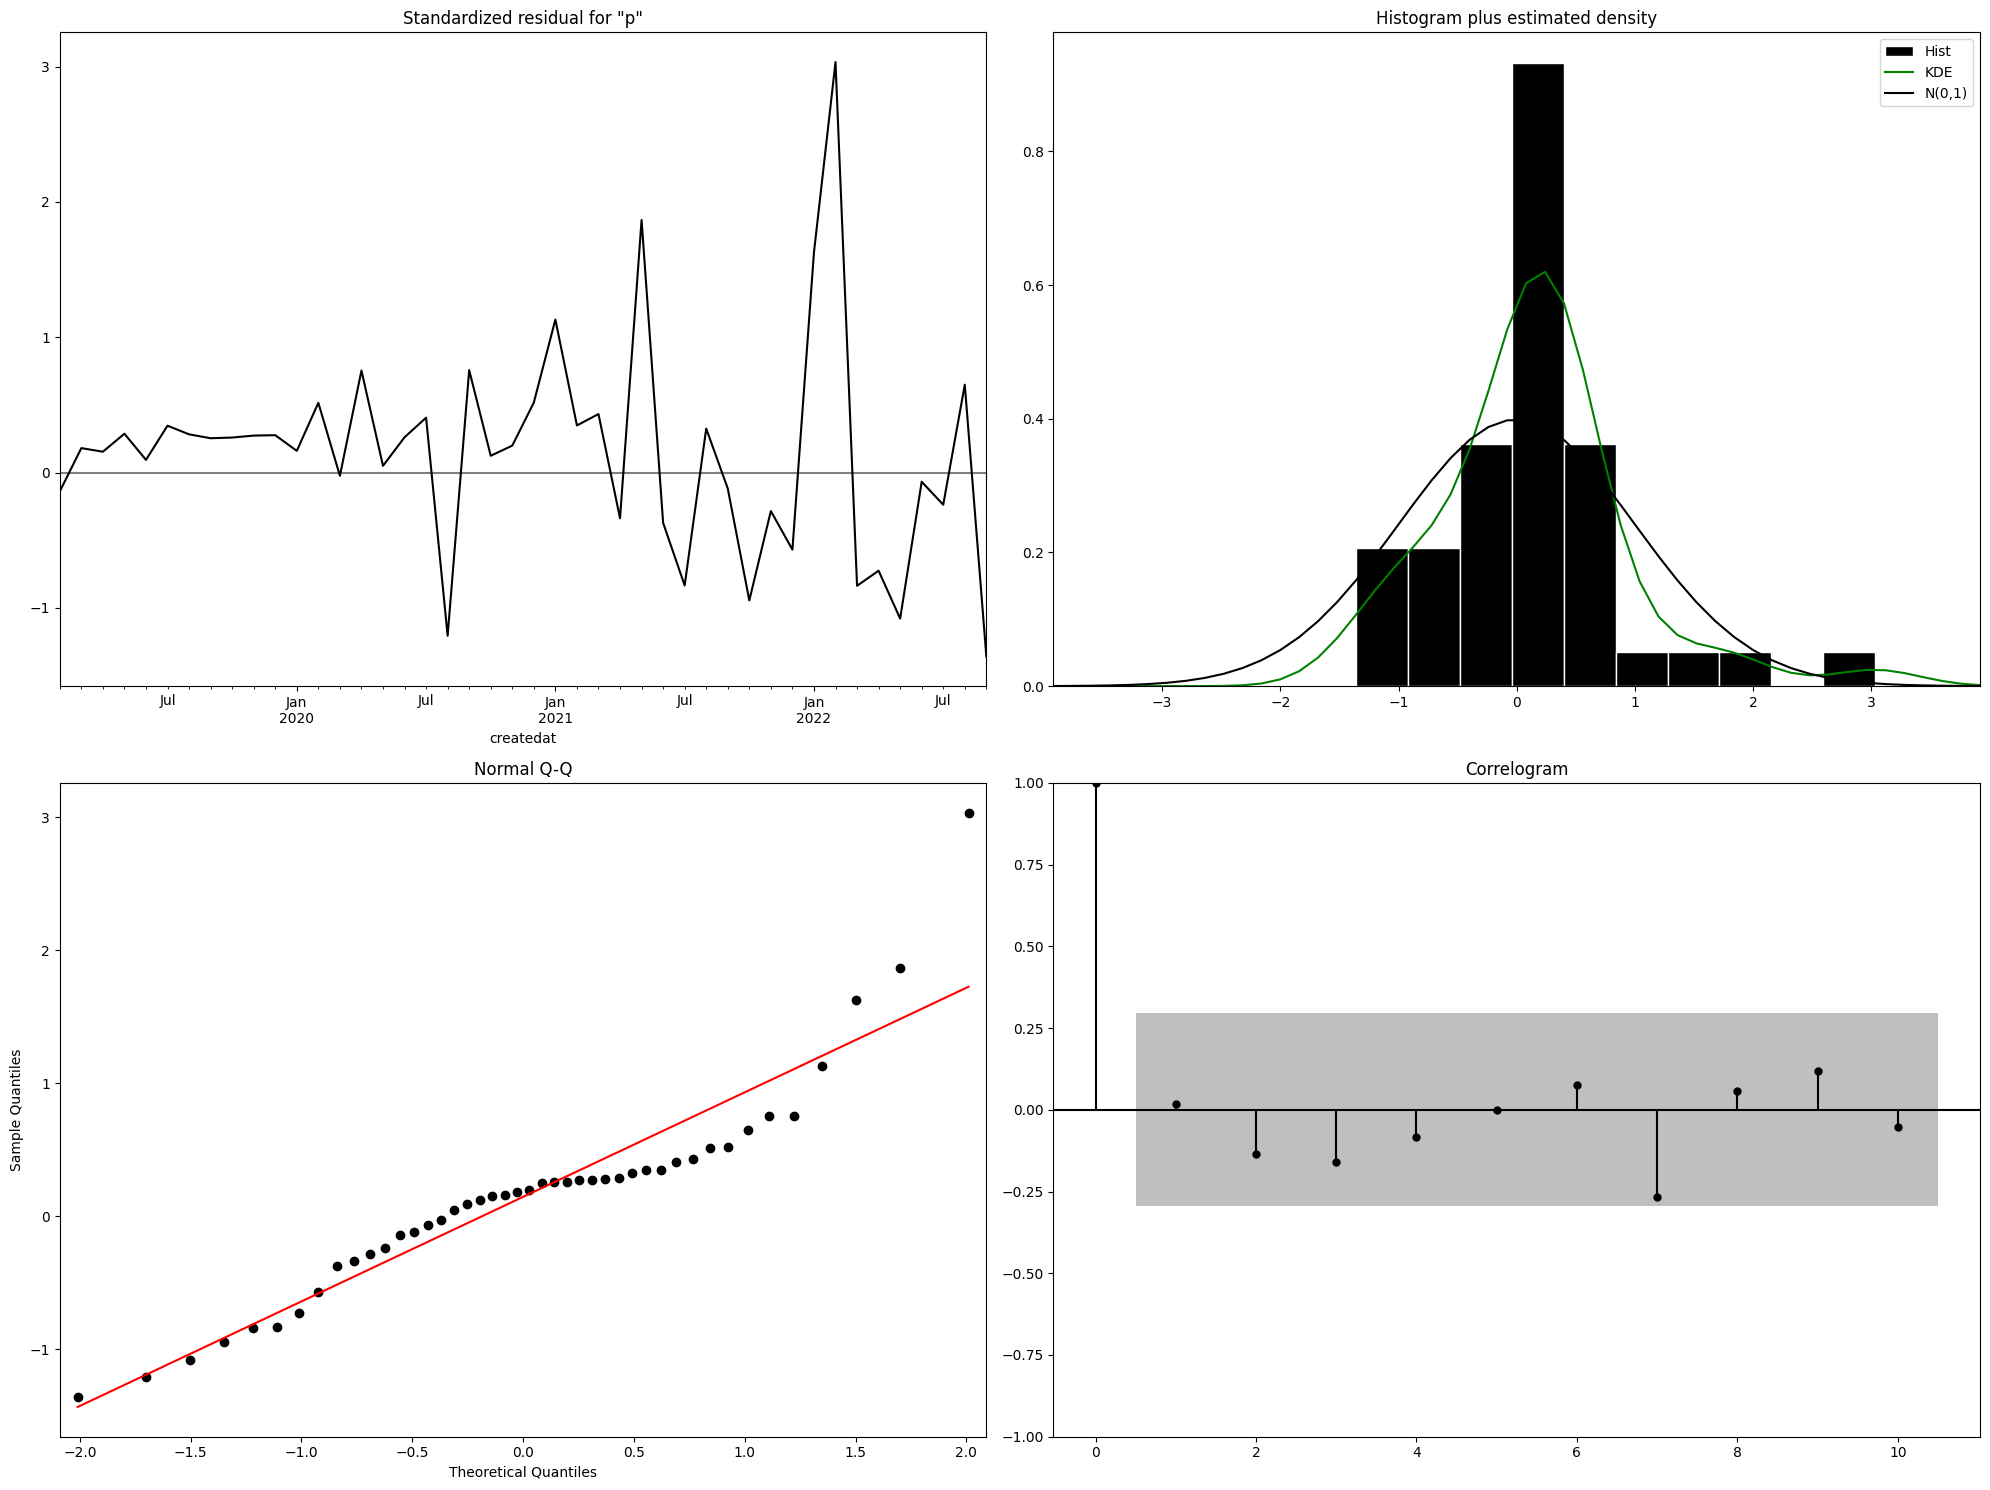

In [9]:
results.plot_diagnostics(figsize=(20, 15));
plt.tight_layout();

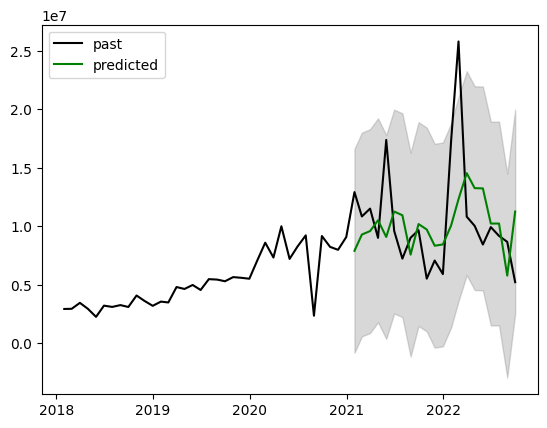

In [10]:
#forecast_object = results.get_forecast(4)
forecast_object = results.get_prediction('2021-01-31')
# Extract predicted mean attribute
mean = forecast_object.predicted_mean

# Calculate the confidence intervals
conf_int = forecast_object.conf_int()

# Extract the forecast dates
dates = mean.index

plt.figure()

# Plot past events levels
plt.plot(y.index, y, label='past');

# Plot the prediction means as line
plt.plot(dates, mean, label='predicted');

# Shade the confidence intervals
plt.fill_between(dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.3)

# Plot legend
plt.legend();